#Lecture One Homework

##1. 
Fit a model to the kirby 21 dataset into colab. Do a scatterplot of the left telencephalon (type 1 level 1) volume by the right.

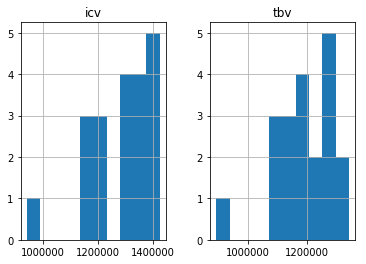

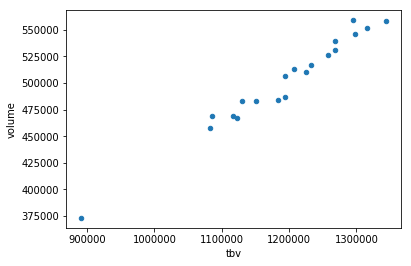

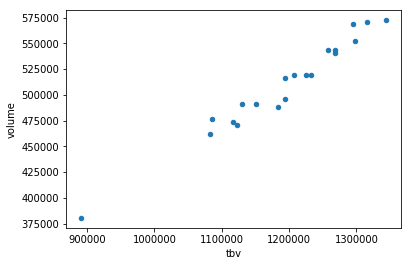

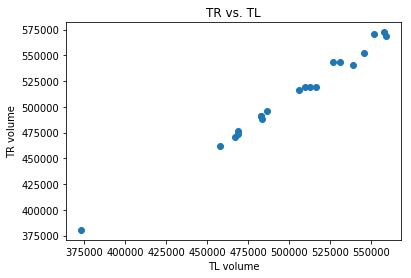

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

df = df.drop(['Unnamed: 0','rawid','min','max'], 1)

TL = df.loc[(df.roi == 'Telencephalon_L') & (df.type == 1) & (df.level == 1)]
TR = df.loc[(df.roi == 'Telencephalon_R') & (df.type == 1) & (df.level == 1)]
TLR = df.loc[((df.roi == 'Telencephalon_R') | (df.roi == 'Telencephalon_L'))  & (df.type == 1) & (df.level == 1)]

TL.hist(['tbv','icv'])
TL.plot.scatter(x = 'tbv', y = 'volume')
TR.plot.scatter(x = 'tbv', y = 'volume')

plt.figure()
plt.scatter(TLR[TLR['roi'] == 'Telencephalon_L']['volume'], TLR[TLR['roi'] == 'Telencephalon_R']['volume'])
plt.xlabel('TL volume')
plt.ylabel('TR volume')
plt.title('TR vs. TL')
plt.show()



##2.
Create a vector of the left telencelphalon (type 1 level 1) volume values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot. To obtain the regression slope, both code it yourself and use a regression function in python.

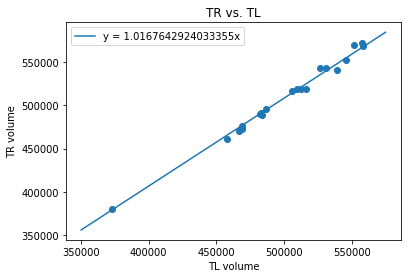

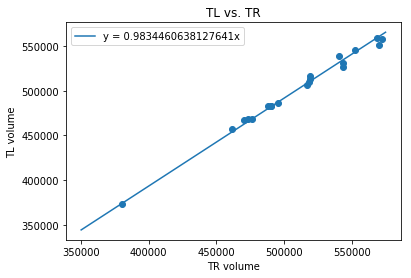

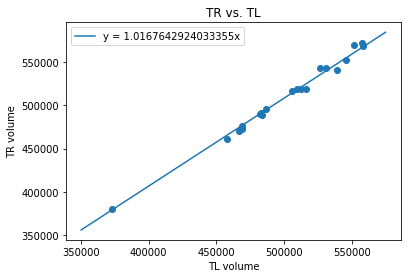

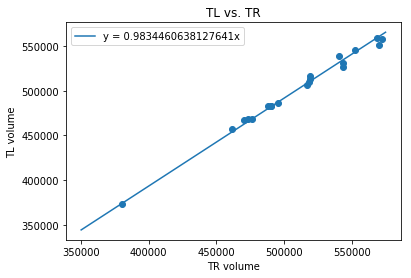

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lr

def regrSlope(x,y):
  C = 0
  N = 0
  for ii in range(len(x)):
                  C = C+(x.iloc[ii]*y.iloc[ii])
                  N = N+(x.iloc[ii]*x.iloc[ii])
  return C/N

def pyRegSlope(x,y):
  x = np.array(x).reshape((-1,1))
  model = lr(fit_intercept=False).fit(x, y)
  return model.coef_[0]

df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

df = df.drop(['Unnamed: 0','rawid','min','max'], 1)
TLR = df.loc[((df.roi == 'Telencephalon_R') | (df.roi == 'Telencephalon_L'))  & (df.type == 1) & (df.level == 1)]

x = TLR[TLR['roi'] == 'Telencephalon_L']['volume'] - TLR[TLR['roi'] == 'Telencephalon_L']['mean']
y = TLR[TLR['roi'] == 'Telencephalon_R']['volume'] - TLR[TLR['roi'] == 'Telencephalon_R']['mean']

#b0 and g0 are python implementation based
b = regrSlope(x,y)
b0 = pyRegSlope(x,y)
g = regrSlope(y,x)
g0 = pyRegSlope(y,x)

n = range(350000,575000)
b1 = n*b
g1 = n*g
b01 = n*b0
g01 = n*g0

plt.figure()
plt.scatter(x, y)
plt.plot(n,b1,label = 'y = ' + str(b) +'x')
plt.legend()
plt.xlabel('TL volume')
plt.ylabel('TR volume')
plt.title('TR vs. TL')

plt.figure()
plt.scatter(y, x)
plt.plot(n,g1,label = 'y = ' + str(g) +'x')
plt.legend()
plt.xlabel('TR volume')
plt.ylabel('TL volume')
plt.title('TL vs. TR')

plt.figure()
plt.scatter(x, y)
plt.plot(n,b01,label = 'y = ' + str(b0) +'x')
plt.legend()
plt.xlabel('TL volume')
plt.ylabel('TR volume')
plt.title('TR vs. TL')

plt.figure()
plt.scatter(y, x)
plt.plot(n,g01,label = 'y = ' + str(g0) +'x')
plt.legend()
plt.xlabel('TR volume')
plt.ylabel('TL volume')
plt.title('TL vs. TR')

plt.show()


##3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?

B -> B/c